# The transformer model for sequence prediction

Deep learning is all about *learning* useful *functions* from big *datasets*. These useful functions are called neural networks, and are put together from smaller functions with parameters that are decided through optimization. In opposition to conventional programming, where we tell the computer what to do, neural networks learns from observational data and figure out its own solution to the given problem. Here we will implement the transformer model, one of the main components in big languagemodels like *ChatGPT*.

## **0.0** Structure of the project

For this project the main code is located in separate `.py`-files. Most of our classes are in the `layers.py` and `neural_network.py` files. The eception is the training and testing functions, which are located in the `training.py`-file.

The main body of the report is found in this file, but the training and testing of the neural network is found in `training_the_network.ipynb`-file.

## **1.0** Structure of the datasets and the transformermodel

**(1)** Let          $a = 15$, $b = 7$, $c = 47$, $d = 152$

then we have   $x = [1, 5, 7, 4, 7, 1, 5]$, $y =[1, 5, 2]$


**(2)** Let   

$x^{(0)} = [1, 5, 7, 4, 7]$

$x^{(1)} = [1, 5, 7, 4, 7, \hat{z_4}]$

$x^{(2)} = [1, 5, 7, 4, 7, \hat{z_4}, \hat{z_5}]$

$x^{(3)} = [1, 5, 7, 4, 7, \hat{z_4}, \hat{z_5}, \hat{z_6}]$

$f_{\theta}(x^{(0)}) = [\hat{z_0^{(0)}}, \hat{z_1^{(0)}}, \hat{z_2^{(0)}}, \hat{z_3^{(0)}}, \hat{z_4^{(0)}}]$

$f_{\theta}(x^{(0)}) = [\hat{z_0^{(1)}}, \hat{z_1^{(1)}}, \hat{z_2^{(1)}}, \hat{z_3^{(1)}}, \hat{z_4^{(1)}}, \hat{z_5^{(1)}}]$

$f_{\theta}(x^{(0)}) = [\hat{z_0^{(2)}}, \hat{z_1^{(2)}}, \hat{z_2^{(2)}}, \hat{z_3^{(2)}}, \hat{z_4^{(2)}}, \hat{z_5^{(2)}}, \hat{z_6^{(2)}}]$

If the optimization is good, the result should be:

$\hat{z_4^{(0)}} = 1, \hat{z_5^{(1)}} = 5$ and $\hat{z_6^{(2)}} = 2$

i.e. $[\hat{z_4^{(0)}}, \hat{z_5^{(1)}}, \hat{z_6^{(2)}}] = y$

**(3)**

For the object function to be $\mathcal{L}(\theta, \mathcal{D}) = 0$, the probability distribution must be given by:

$\hat{Y} = onehot(y) = \begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}$

In this case $\hat{y}$ will be given by:

$\hat{y} := argmax(\hat{Y}) = y$

Then, $\mathcal{L} = 0$ will be fulfilled.

**(4)**

The number of parameters is given by:

$d(2m + n_{max} + L(4k + 2p))$

**(5)**

$X = \mathrm{onehot}(x) = \begin{bmatrix}
0 \\
1
\end{bmatrix}, z_0 = W_Ex + [W_P]_{0:n} = \begin{bmatrix}
1 & 0 \\
0 & \alpha
\end{bmatrix} \begin{bmatrix}
0 \\
1
\end{bmatrix} + \begin{bmatrix}
1 \\
0
\end{bmatrix} = \begin{bmatrix}
0 \\
\alpha
\end{bmatrix} + \begin{bmatrix}
1 \\
0
\end{bmatrix} = \begin{bmatrix}
1 \\
\alpha
\end{bmatrix}$

$Z = \mathrm{softmax}\left(\begin{bmatrix}
1 \\
\alpha
\end{bmatrix}\right) = \begin{bmatrix}
\frac{e^1}{e^1+1^{\alpha}} \\
\frac{e^{\alpha}}{e^1+e^{\alpha}}
\end{bmatrix}$

$\hat{z} = 1 \Rightarrow \alpha > 1$ (when $\alpha=1$, undefined)


## **2.0** Implementing the transformermodel

**(1)** noe må fikses


1) If the type of layer is identified as `LinearLayer` or `Attention`, `NeuralNetwork` will inherit `step_gd` from the `Layer` class. 

2) If the type of layer is identified as `EmbedPosition`, `NeuralNetwork` will inherit `step_gd` from the `EmbedPosition` class. 

3) If the type of layer is identified as `FeedForward`, `NeuralNetwork` will inherit `step_gd` from the `FeedForward` class.


## **3.3(1)** Sorting of 0 and 1

In [1]:
from neural_network import *
from layers import *
from training import trainModel
from data_generators import get_train_test_addition, get_train_test_sorting
from training import *

import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Parameters for 0-1 sorting
r = 5
m = 2
batchSize = 250
batches = 10
d = 10
k = 5
p = 15
L = 2
n_max = 2*r-1
sigma = Relu

data = get_train_test_sorting(r, m, batchSize, batches)

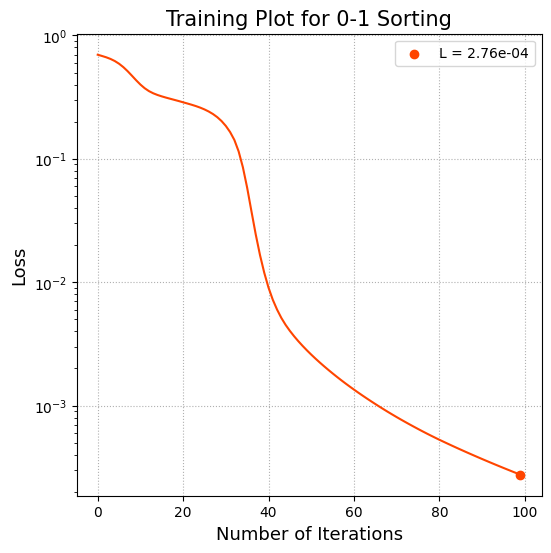

In [3]:
with open("sorting_01_Trained_loss", 'rb') as f:
    losses = pickle.load(f)

plt.figure(figsize=(6,6))
plt.title("Training Plot for 0-1 Sorting", fontsize=15)
plt.xlabel("Number of Iterations", fontsize=13)
plt.ylabel("Loss", fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle=":")
plt.semilogy(losses, color="orangered")
plt.scatter(len(losses) - 1, losses[-1], label=f"L = {losses[-1]:.2e}", marker="o", color="orangered")
plt.legend()
plt.show()

In [4]:
with open("sorting_01_Trained_nn", 'rb') as f:
    nn = pickle.load(f)

y_pred = predict(nn, data['x_test'],r, m)

# If all elements equal, correct
correct = np.count_nonzero(np.count_nonzero(y_pred == data['y_test'], axis = 2) == y_pred.shape[-1])
all = y_pred.shape[0] * y_pred.shape[1]
print("Testing results of 0-1 sorting:")
print(f"# of correct predictions: {correct}, # of tests: {all}, percentage: {correct/all*100}%")

Testing results of 0-1 sorting:
# of correct predictions: 250, # of tests: 250, percentage: 100.0%


## **3.3(2)** Sorting of Larger Lists With Multiple Element Values 

In [5]:
# Params for regular sorting
r = 7
m = 5
batchSize = 250
batches = 10
iterations = 100
d = 20
k = 10
p = 25
L = 2
n_max = 2*r-1

data = get_train_test_sorting(r,m,batchSize, batches)

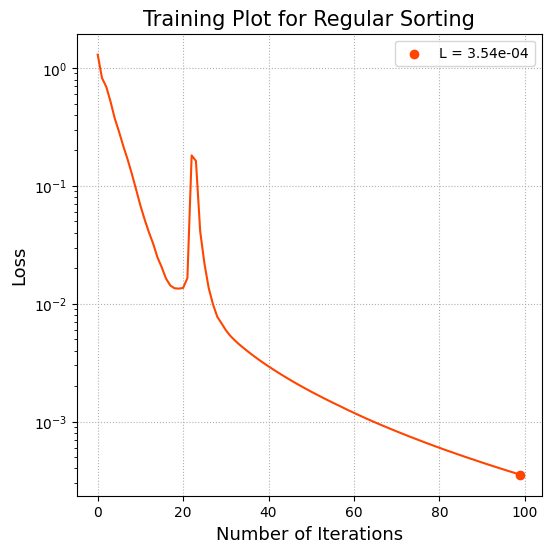

In [6]:
with open("sorting_Reg_Trained_loss", 'rb') as f:
    losses = pickle.load(f)

plt.figure(figsize=(6,6))
plt.title("Training Plot for Regular Sorting", fontsize=15)
plt.xlabel("Number of Iterations", fontsize=13)
plt.ylabel("Loss", fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle=":")
plt.semilogy(losses, color="orangered")
plt.scatter(len(losses) - 1, losses[-1], label=f"L = {losses[-1]:.2e}", marker="o", color="orangered")
plt.legend()
plt.show()

In [7]:
with open("sorting_Reg_Trained_nn", 'rb') as f:
    nn = pickle.load(f)

y_pred = predict(nn, data['x_test'],r, m)

# If all elements equal, correct
correct = np.count_nonzero(np.count_nonzero(y_pred == data['y_test'], axis = 2) == y_pred.shape[-1])
all = y_pred.shape[0] * y_pred.shape[1]
print("Testing results of regular sorting:")
print(f"# of correct predictions: {correct}, # of tests: {all}, percentage: {correct/all*100}%")

Testing results of regular sorting:
# of correct predictions: 250, # of tests: 250, percentage: 100.0%


## **3.4** Addition of 2-digit numbers

In [8]:
batch_size = 250
batches = 20
d = 30
r = 3
k = 20
p = 40
L = 3
m = 10
n_max = 2*2 + 3

data = get_train_test_addition(2,batch_size,20)

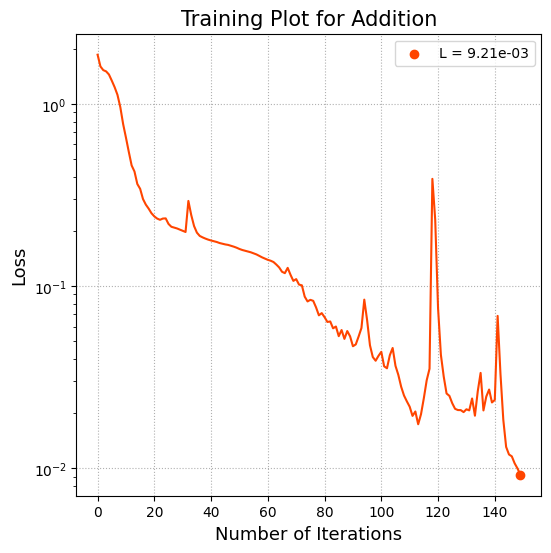

In [9]:
with open("additionTrained1_loss", 'rb') as f:
    losses = pickle.load(f)

plt.figure(figsize=(6,6))
plt.title("Training Plot for Addition", fontsize=15)
plt.xlabel("Number of Iterations", fontsize=13)
plt.ylabel("Loss", fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle=":")
plt.semilogy(losses, color="orangered")
plt.scatter(len(losses) - 1, losses[-1], label=f"L = {losses[-1]:.2e}", marker="o", color="orangered")
plt.legend()
plt.show()

In [10]:
with open("additionTrained1_nn", 'rb') as f:
    nn = pickle.load(f)

y_pred = predict(nn, data['x_test'],r, m)

# If all elements equal, the prediction is correct.Also reverses prediction back to regular order
correct = np.count_nonzero(np.count_nonzero(y_pred[:,:,::-1] == data['y_test'], axis = 2) == y_pred.shape[-1])
all = y_pred.shape[0] * y_pred.shape[1]
print("Testing results of addition:")
print(f"# of correct predictions: {correct}, # of tests: {all}, percentage: {correct/all*100}%")

Testing results of addition:
# of correct predictions: 244, # of tests: 250, percentage: 97.6%


Insert konklusjon da

#### **Reference list**

Nielsen, M. *Neural Networks and Deep Learning*. http://neuralnetworksanddeeplearning.com/index.html 